Dimensione di ciascuna immagine: 128x128


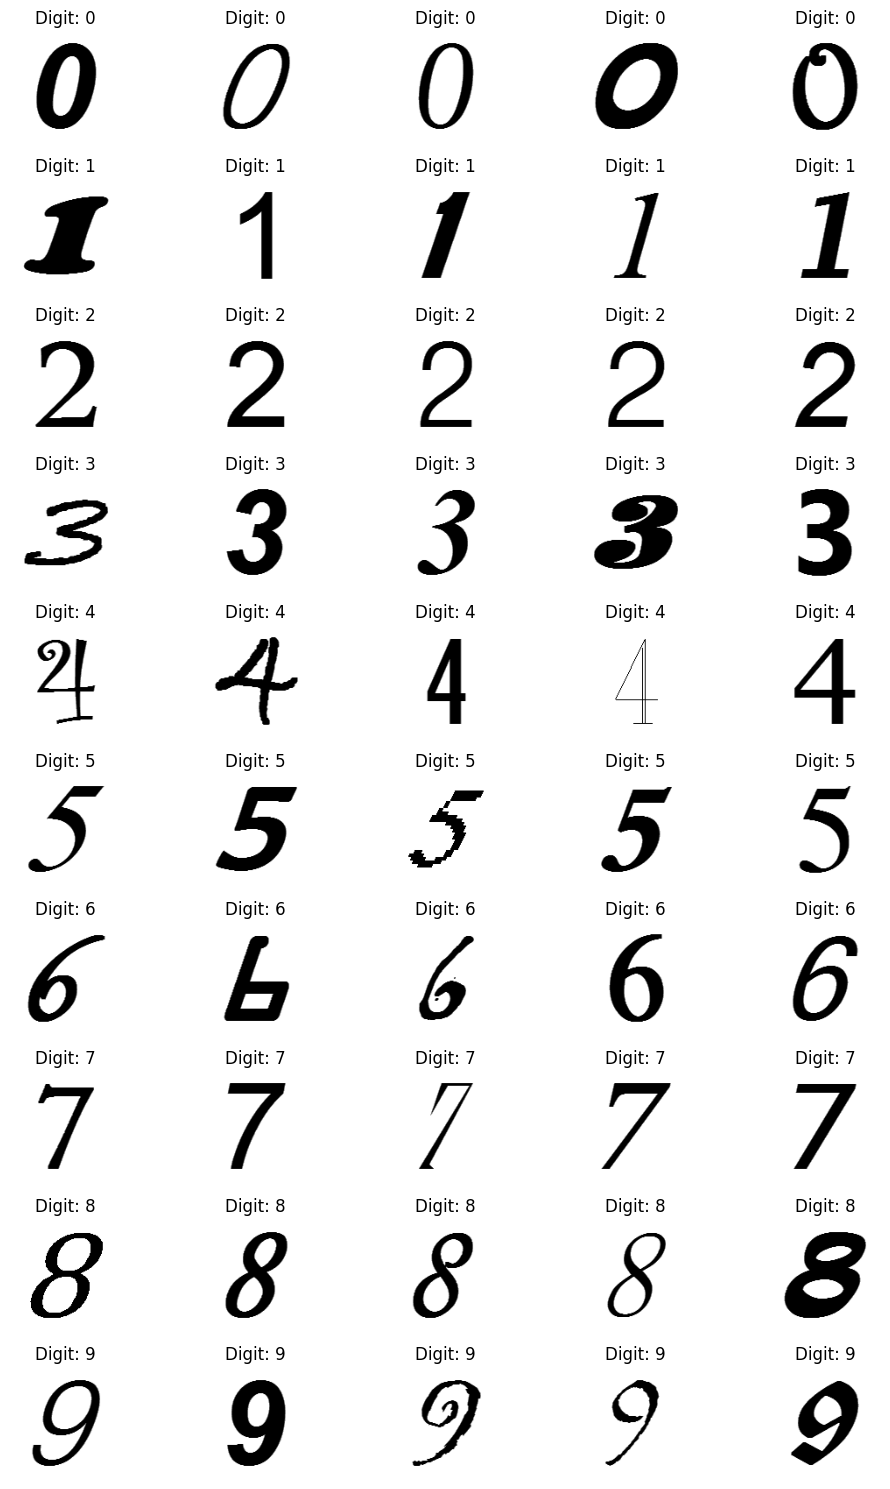

In [3]:
import kagglehub
import os
import matplotlib.pyplot as plt
from PIL import Image
import random

def load_dataset():
    path = kagglehub.dataset_download("karnikakapoor/digits")
    dataset_path = os.path.join(path, "digits updated/digits updated")
    return dataset_path

dataset_path = load_dataset()

digit_folders = sorted(os.listdir(dataset_path))
num_images = 5
fig, axes = plt.subplots(len(digit_folders), num_images, figsize=(10, 15))

# Carica una delle immagini per ottenere la dimensione e stamparla una sola volta
img_path = os.path.join(dataset_path, digit_folders[0], os.listdir(os.path.join(dataset_path, digit_folders[0]))[0])
img = Image.open(img_path)
img_size = img.size

# Stampa la dimensione una sola volta
print(f"Dimensione di ciascuna immagine: {img_size[0]}x{img_size[1]}")

for i, digit in enumerate(digit_folders):
    digit_path = os.path.join(dataset_path, digit)
    images = os.listdir(digit_path)
    selected_images = random.sample(images, min(num_images, len(images)))
    
    for j, img_name in enumerate(selected_images):
        img_path = os.path.join(digit_path, img_name)
        img = Image.open(img_path)

        # Mostra l'immagine
        axes[i, j].imshow(img, cmap="gray")
        axes[i, j].axis("off")
        axes[i, j].set_title(f"Digit: {digit}")

plt.tight_layout()
plt.show()


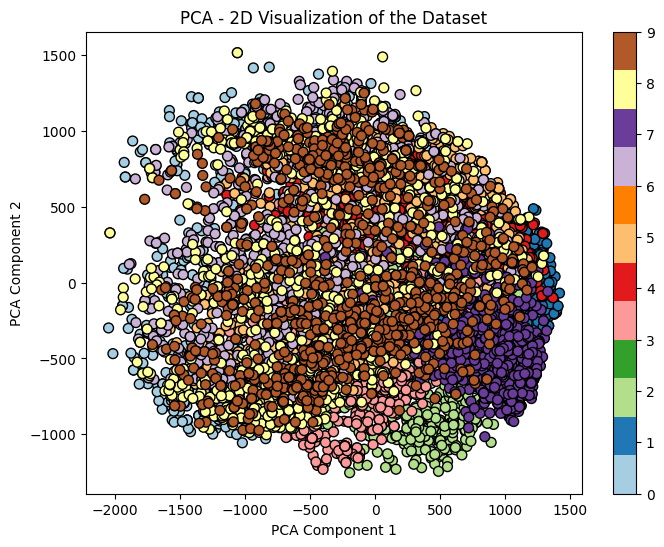

In [9]:
from sklearn.decomposition import PCA
import numpy as np
import kagglehub
import os
import matplotlib.pyplot as plt
from PIL import Image

def preprocess_images(dataset_path, img_size=(28, 28)):
    x = []
    y = []

    for digit in sorted(os.listdir(dataset_path)):
        digit_path = os.path.join(dataset_path, digit)
        images = os.listdir(digit_path)

        for img_name in images:
            img_path = os.path.join(digit_path, img_name)
            img = Image.open(img_path).convert("L")
            img = img.resize(img_size)
            img_array = np.array(img).flatten()
            x.append(img_array)
            y.append(int(digit))

    x = np.array(x)
    y = np.array(y)
    return x, y

def plot_2d_pca(x, y, num_samples=1000):
    # Select a random subset of the data if the dataset is too large
    if len(x) > num_samples:
        indices = np.random.choice(len(x), num_samples, replace=False)
        x_subset = x[indices]
        y_subset = y[indices]
    else:
        x_subset = x
        y_subset = y

    # Reduce the dimensions of the subset to 2D using PCA
    pca = PCA(n_components=2)
    x_pca = pca.fit_transform(x_subset)

    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_subset, cmap=plt.cm.Paired, edgecolors='k', s=50)

    # Add a color bar and labels
    plt.title('PCA - 2D Visualization of the Dataset')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(scatter)

    # Show the plot
    plt.show()

x, y = preprocess_images(dataset_path)
plot_2d_pca(x, y, num_samples=x.shape[0])